# 롱-숏 전략 1부. 알파 팩터와 특성 준비

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')


The default interactive shell is now zsh.
To update your account to use zsh, please run `chsh -s /bin/zsh`.
For more details, please visit https://support.apple.com/kb/HT208050.
ock_trading_model_01/notebooks$ 
ock_trading_model_01/notebooks$ 
ock_trading_model_01/notebooks$ 

In [2]:
# !wget https://artiya4u.keybase.pub/TA-lib/ta-lib-0.4.0-src.tar.gz &&tar -xvf ta-lib-0.4.0-src.tar.gz &&cd ta-lib/ &&./configure --prefix=/usr &&make &&sudo make install

--2021-12-06 10:15:20--  https://artiya4u.keybase.pub/TA-lib/ta-lib-0.4.0-src.tar.gz
Resolving artiya4u.keybase.pub (artiya4u.keybase.pub)... 54.152.69.160, 34.237.172.94, 35.173.156.66
Connecting to artiya4u.keybase.pub (artiya4u.keybase.pub)|54.152.69.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1330299 (1.3M) [application/gzip]
Saving to: ‘ta-lib-0.4.0-src.tar.gz’

ta-lib-0.4.0-src.ta 100%[===================>]   1.27M  --.-KB/s    in 0.1s    

2021-12-06 10:15:21 (12.4 MB/s) - ‘ta-lib-0.4.0-src.tar.gz’ saved [1330299/1330299]

ta-lib/
ta-lib/config.sub
ta-lib/aclocal.m4
ta-lib/CHANGELOG.TXT
ta-lib/include/
ta-lib/include/ta_abstract.h
ta-lib/include/ta_func.h
ta-lib/include/ta_common.h
ta-lib/include/ta_config.h.in
ta-lib/include/Makefile.am
ta-lib/include/ta_libc.h
ta-lib/include/ta_defs.h
ta-lib/missing
ta-lib/ta-lib.spec.in
ta-lib/config.guess
ta-lib/Makefile.in
ta-lib/ta-lib.dpkg.in
ta-lib/Makefile.am
ta-lib/autogen.sh
ta-lib/install-sh
ta-lib/c

In [3]:
# !pip install --upgrade TA-Lib==0.4.19 tables

     |████████████████████████████████| 267 kB 5.2 MB/s 
     |████████████████████████████████| 4.3 MB 35.9 MB/s 
  Created wheel for TA-Lib: filename=TA_Lib-0.4.19-cp37-cp37m-linux_x86_64.whl size=1438000 sha256=e2c0f3f6451f9996862e37ec75553ff400f0568aa217b4ebe9ba9464df7138c5
  Stored in directory: /root/.cache/pip/wheels/56/67/ab/59a448d66d7724ceeb7f77050ae0409a337ae194a278407f0a
Successfully built TA-Lib
  Attempting uninstall: tables
    Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4


여기서는 그레이디언트 부스팅 모델에 의해 산출되는 일일 수익률 예측에 따라 미국 주식에 대한 거래 전략을 설계, 구현 및 평가하기 시작할 것이다.

앞의 예에서와 같이, 우리는 틀을 만들고 여러분이 자신만의 실험을 실행할 수 있도록 적응할 수 있는 구체적인 예를 만들 것이다. 자산 클래스 및 투자 유니버스부터 특성, 보유 기간 또는 거래 규칙과 같은 보다 세분화된 측면에 이르기까지 다양한 측면이 있다. 예를 들어, 다양한 추가 특성에 대해서는[부록](../24_alpha_factor_library)의 **Alpha 요인 라이브러리**를 참조하십시오.

우리는 거래 전략을 단순하게 유지하고 단일 ML 신호만 사용할 것이다. 실제 애플리케이션은 서로 다른 데이터셋 또는 서로 다른 룩어헤드 또는 룩어헤드 기간으로 훈련된 보완적 ML 모델과 같이 서로 다른 소스의 여러 신호를 사용할 가능성이 높다. 또한 단순한 손절매(stop-loss)에서 위험 가치(VaR) 분석에 이르기까지 정교한 위험 관리를 사용한다.

**6개의 노트북**은 당사의 워크플로우 순서를 다룬다.

1. 'preparing_the_model_data'(이 노트북): Quandl Wiki 데이터에서 몇 가지 간단한 특성을 가공한다. 
2. [trading_signals_with_lightgbm_and_catboost](05_trading_signals_with_lightgbm_and_catboost.ipynb): 2015/16을 검증 기간으로 사용해 모델을 선택하도록 LightGBM과 CatBoost의 하이퍼 파라미터를 튜닝한다. 
3. [evaluate_trading_signals](06_evaluate_trading_signals.ipynb): 다양한 척도를 사용해 교차 검증 성과를 비교해 최적의 모델을 선택한다. 
4. [model_interpretation](07_model_interpretation.ipynb): 최적 모델의 예측 뒤에 숨은 동인을 자세히 살펴본다.
5.  [making_out_of_sample_predictions](08_making_out_of_sample_predictions.ipynb): 2017년 표본외 테스트 기간에 대한 예측을 생성한다.
6.  [backtesting_with_zipline](09_backtesting_with_zipline.ipynb): Zipline을 사용한 예측 시그널을 기반으로 롱-숏 전략의 역사적 성과를 평가한다.

## 라이브러리 불러오기와 설정

In [4]:
# import warnings
# warnings.filterwarnings('ignore')

In [1]:
# m1 macbook인 경우 arm64 arch에서 miniforge 사용해서 환경을 만들어야한다.

%matplotlib inline
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import talib
#from talib import RSI, BBANDS, MACD, ATR

In [6]:
#os.chdir('/content/drive/MyDrive/금융특화 AI 역량강화교육 - 증권 (심화) -/12_gradient_boosting_machines')

In [2]:
MONTH = 21
YEAR = 12 * MONTH

In [3]:
START = '2010-01-01'
END = '2017-12-31'

In [4]:
sns.set_style('darkgrid')
idx = pd.IndexSlice

In [5]:
percentiles = [.001, .01, .02, .03, .04, .05]
percentiles += [1-p for p in percentiles[::-1]]

In [6]:
T = [1, 5, 10, 21, 42, 63]

## Quandl Wiki 주식가격 데이터와 메타 데이터 로딩

In [7]:
DATA_STORE = '../data/assets.h5'
ohlcv = ['adj_open', 'adj_close', 'adj_low', 'adj_high', 'adj_volume']
with pd.HDFStore(DATA_STORE) as store:
    prices = (store['quandl/wiki/prices']
              .loc[idx[START:END, :], ohlcv] # select OHLCV columns from 2010 until 2017
              .rename(columns=lambda x: x.replace('adj_', '')) # simplify column names
              .swaplevel()
              .sort_index())
    metadata = (store['us_equities/stocks'].loc[:, ['marketcap', 'sector']])

ImportError: Missing optional dependency 'tables'.  Use pip or conda to install tables.

In [13]:
prices.volume /= 1e3 # 거래량을 다루기 쉽게 좀 작은 숫자로 만들자. 
prices.index.names = ['symbol', 'date']
metadata.index.name = 'symbol'

## 관측 수가 불충분한 종목을 제거

최소 7년의 데이터가 필요하다. 표본내 및 표본외 기간을 모두 사용해 단순화하고 선택한다. 선견 편향(lookahead bias)을 방지하기 위해 단지 훈련 기간만 사용해 데이터를 제거하는 것이 더 정확할 수 있다.

In [14]:
min_obs = 7 * YEAR
nobs = prices.groupby(level='symbol').size()
keep = nobs[nobs > min_obs].index
prices = prices.loc[idx[keep, :], :]

### 가격과 메타데이터 정렬

In [15]:
metadata = metadata[~metadata.index.duplicated() & metadata.sector.notnull()]
metadata.sector = metadata.sector.str.lower().str.replace(' ', '_')

In [16]:
shared = (prices.index.get_level_values('symbol').unique()
          .intersection(metadata.index))
metadata = metadata.loc[shared, :]
prices = prices.loc[idx[shared, :], :]

### 시가총액 최상 1,000 종목으로 제한

다시, 우리의 유니버스를 선택하기 위해 훈련 기간뿐만 아니라 전체 샘플 기간을 단순화하고 사용한다.

In [17]:
universe = metadata.marketcap.nlargest(1000).index
prices = prices.loc[idx[universe, :], :]
metadata = metadata.loc[universe]

In [18]:
metadata.sector.value_counts()

consumer_services        186
finance                  169
technology               116
health_care              104
capital_goods             93
basic_industries          68
consumer_non-durables     64
public_utilities          58
energy                    55
consumer_durables         39
miscellaneous             26
transportation            22
Name: sector, dtype: int64

In [19]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2004229 entries, ('AAPL', Timestamp('2010-01-04 00:00:00')) to ('MATW', Timestamp('2017-12-29 00:00:00'))
Data columns (total 5 columns):
 #   Column  Dtype  
---  ------  -----  
 0   open    float64
 1   close   float64
 2   low     float64
 3   high    float64
 4   volume  float64
dtypes: float64(5)
memory usage: 84.9+ MB


In [20]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, AAPL to MATW
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   marketcap  1000 non-null   float64
 1   sector     1000 non-null   object 
dtypes: float64(1), object(1)
memory usage: 23.4+ KB


### 롤링 평균 거래금액으로 자사의 순위를 매긴다. ( Rank assets by Rolling Average Dollar Volume)

#### 거래금액 계산(Compute dollar volume)

In [21]:
prices['dollar_vol'] = prices[['close', 'volume']].prod(1).div(1e3)

#### 21일 이동평규 (21-day moving average)

In [22]:
# 유니버스를 결정하기 위해 거래금액 계산
dollar_vol_ma = (prices
                 .dollar_vol
                 .unstack('symbol')
                 .rolling(window=21, min_periods=1) # 1 trading month
                 .mean())

#### 이동평균으로 주식 순위 매김

In [23]:
prices['dollar_vol_rank'] = (dollar_vol_ma
                            .rank(axis=1, ascending=False)
                            .stack('symbol')
                            .swaplevel())

In [24]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2004229 entries, ('AAPL', Timestamp('2010-01-04 00:00:00')) to ('MATW', Timestamp('2017-12-29 00:00:00'))
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   open             float64
 1   close            float64
 2   low              float64
 3   high             float64
 4   volume           float64
 5   dollar_vol       float64
 6   dollar_vol_rank  float64
dtypes: float64(7)
memory usage: 115.5+ MB


## 몇 개 기본 팩터를 추가 

아래의 지표들에 대한 세부사항을 위해서는 [appendix](../24_alpha_factor_library) 참조

### RSI

In [25]:
prices['rsi'] = prices.groupby(level='symbol').close.apply(RSI)

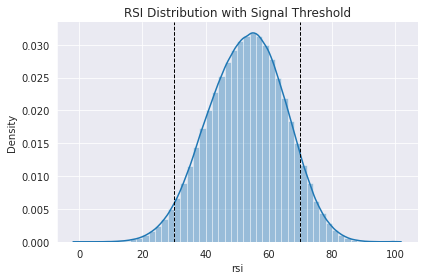

In [26]:
ax = sns.distplot(prices.rsi.dropna())
ax.axvline(30, ls='--', lw=1, c='k')
ax.axvline(70, ls='--', lw=1, c='k')
ax.set_title('RSI Distribution with Signal Threshold')
sns.despine()
plt.tight_layout();

### Bollinger Bands

In [27]:
def compute_bb(close):
    high, mid, low = BBANDS(close, timeperiod=20)
    return pd.DataFrame({'bb_high': high, 'bb_low': low}, index=close.index)

In [28]:
prices = (prices.join(prices
                      .groupby(level='symbol')
                      .close
                      .apply(compute_bb)))

In [29]:
prices['bb_high'] = prices.bb_high.sub(prices.close).div(prices.bb_high).apply(np.log1p)
prices['bb_low'] = prices.close.sub(prices.bb_low).div(prices.close).apply(np.log1p)

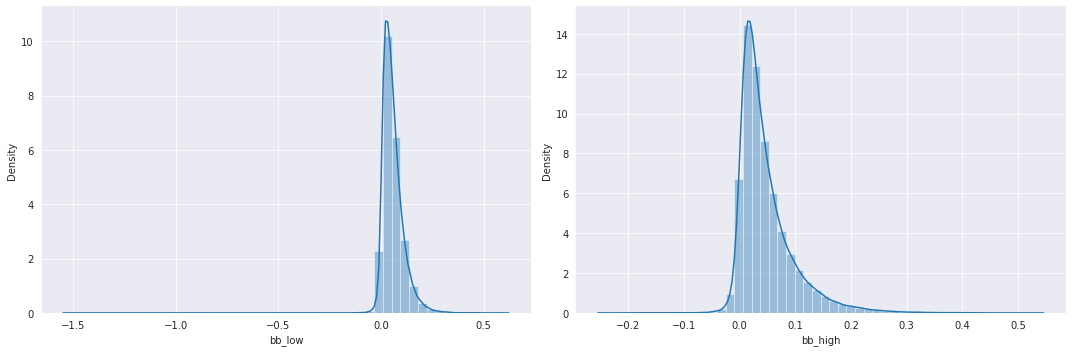

In [30]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
sns.distplot(prices.loc[prices.dollar_vol_rank<100, 'bb_low'].dropna(), ax=axes[0])
sns.distplot(prices.loc[prices.dollar_vol_rank<100, 'bb_high'].dropna(), ax=axes[1])
sns.despine()
plt.tight_layout();

### ATR(Average True Range)

In [31]:
prices['NATR'] = prices.groupby(level='symbol', 
                                group_keys=False).apply(lambda x: 
                                                        talib.NATR(x.high, x.low, x.close))

In [32]:
def compute_atr(stock_data):
    df = ATR(stock_data.high, stock_data.low, 
             stock_data.close, timeperiod=14)
    return df.sub(df.mean()).div(df.std())

In [33]:
prices['ATR'] = (prices.groupby('symbol', group_keys=False)
                 .apply(compute_atr))

### MACD(Moving Average Convergence/Divergence)

In [34]:
prices['PPO'] = prices.groupby(level='symbol').close.apply(talib.PPO)

In [ ]:
def compute_macd(close):
    macd = MACD(close)[0]
    return (macd - np.mean(macd))/np.std(macd)

In [ ]:
prices['MACD'] = (prices
                  .groupby('symbol', group_keys=False)
                  .close
                  .apply(compute_macd))

### 가격과 메타데이터 결합

In [35]:
metadata.sector = pd.factorize(metadata.sector)[0].astype(int)
prices = prices.join(metadata[['sector']])

# 수익률 계산

### 역사적 수익률

In [36]:
by_sym = prices.groupby(level='symbol').close
for t in T:
    prices[f'r{t:02}'] = by_sym.pct_change(t)

### 일별 역사적 수익률 10분위수

In [37]:
for t in T:
    prices[f'r{t:02}dec'] = (prices[f'r{t:02}']
                             .groupby(level='date')
                             .apply(lambda x: pd.qcut(x, 
                                                      q=10, 
                                                      labels=False, 
                                                      duplicates='drop')))

### 일별 섹터 수익률 10분위수 

In [38]:
for t in T:
    prices[f'r{t:02}q_sector'] = (prices
                                  .groupby(['date', 'sector'])[f'r{t:02}']
                                  .transform(lambda x: pd.qcut(x, 
                                                               q=5, 
                                                               labels=False, 
                                                               duplicates='drop')))

### 미래 수익률

In [39]:
for t in [1, 5, 21]:
    prices[f'r{t:02}_fwd'] = prices.groupby(level='symbol')[f'r{t:02}'].shift(-t)

## 이상치 제거

In [40]:
prices[[f'r{t:02}' for t in T]].describe()

,r01,r05,r10,r21,r42,r63
count,2.003229e+06,1.999229e+06,1.994229e+06,1.983229e+06,1.962229e+06,1.941229e+06
mean,7.584095e-04,3.758378e-03,7.415710e-03,1.568035e-02,3.136456e-02,4.654007e-02
std,2.216715e-02,4.904074e-02,6.740349e-02,9.694103e-02,1.358914e-01,1.661273e-01
min,-7.938596e-01,-7.864607e-01,-7.909253e-01,-7.881174e-01,-8.000000e-01,-8.591667e-01
25%,-8.264463e-03,-1.765745e-02,-2.357274e-02,-3.141994e-02,-3.668869e-02,-3.857902e-02
50%,6.378568e-04,3.663842e-03,7.098912e-03,1.493476e-02,2.881956e-02,4.206502e-02
75%,9.670595e-03,2.479339e-02,3.764517e-02,6.012440e-02,9.431525e-02,1.233119e-01
max,1.216425e+01,1.252657e+01,1.252657e+01,1.252657e+01,1.181643e+01,1.166968e+01


데이터 오류를 나타낼 가능성이 높기 때문에 일일 수익률이 100%를 넘는 종목은 제거한다. 여기서 100%를 컷오프로 하고 있지만 필요시 변경할 수 있다. 표본 기간을 대표하지 않는 종목을 결정하기 위해 보다 세심한 탐험적, 역사적 분석을 적용해야 한다.

In [41]:
outliers = prices[prices.r01 > 1].index.get_level_values('symbol').unique()

In [42]:
prices = prices.drop(outliers, level='symbol')

## 시간과 섹터 더미 변수

In [43]:
prices['year'] = prices.index.get_level_values('date').year
prices['month'] = prices.index.get_level_values('date').month
prices['weekday'] = prices.index.get_level_values('date').weekday

## 모델 데이터 저장

In [44]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1990361 entries, ('AAPL', Timestamp('2010-01-04 00:00:00')) to ('MATW', Timestamp('2017-12-29 00:00:00'))
Data columns (total 38 columns):
 #   Column           Dtype  
---  ------           -----  
 0   open             float64
 1   close            float64
 2   low              float64
 3   high             float64
 4   volume           float64
 5   dollar_vol       float64
 6   dollar_vol_rank  float64
 7   rsi              float64
 8   bb_high          float64
 9   bb_low           float64
 10  NATR             float64
 11  ATR              float64
 12  PPO              float64
 13  sector           int64  
 14  r01              float64
 15  r05              float64
 16  r10              float64
 17  r21              float64
 18  r42              float64
 19  r63              float64
 20  r01dec           float64
 21  r05dec           float64
 22  r10dec           float64
 23  r21dec           float64
 24  r42dec           float64
 

In [45]:
prices.drop(['open', 'close', 'low', 'high', 'volume'], axis=1).to_hdf('data.h5', 'model_data')